In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Avocado.csv',parse_dates=['Date'], index_col=0)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data=pd.DataFrame(data)

In [6]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1517 entries, 0.0 to 14.0
Data columns (total 13 columns):
Date            1517 non-null datetime64[ns]
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 165.9+ KB


In [8]:
data['year']=data['year'].astype(int)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [9]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int32
region                  object
dtype: object

In [11]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


plt.figure(figsize=(10,5))
ax=sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
ax.set_xticklabels(labels=corr.columns.values, rotation=90)
ax.set_yticklabels(labels=corr.columns.values, rotation=0)
plt.show()

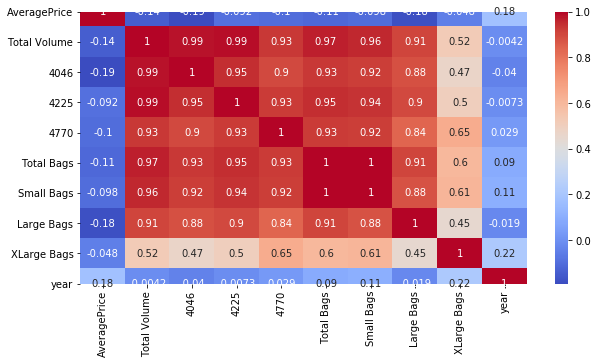

In [12]:
corr=data.corr()
plt.figure(figsize=(10,5))
ax=sns.heatmap(data.corr(),cmap='coolwarm',annot=True) 
ax.set_xticklabels(labels=corr.columns.values, rotation=90) 
ax.set_yticklabels(labels=corr.columns.values, rotation=0) 
plt.show()
# Most of the avocados are sold in small and large bags.
# Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so it can be inferred that most of the sales comes from small bags.

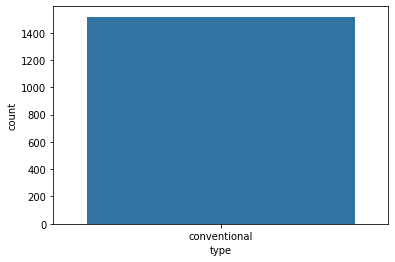

In [13]:
# This shows that the dataset has only conventional type of Avocados
sns.countplot(data['type'])

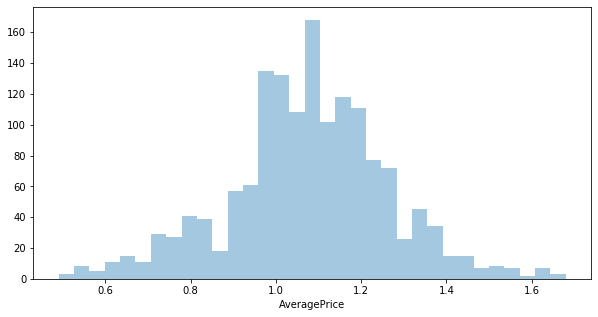

In [14]:
# Analyzing average price distribution
plt.subplots(figsize=(10, 5))
sns.distplot(a=data.AveragePrice, kde=False)
plt.show()

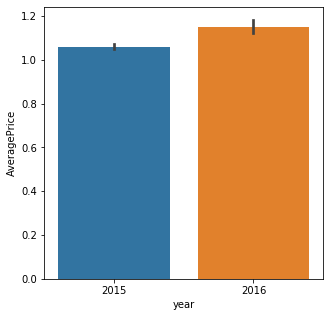

In [15]:
# Analyzing average price by year
# the average price of avocados increased in 2016 as compared to 2015
plt.figure(figsize=(5,5))
sns.barplot(x='year',y='AveragePrice', data=data)

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

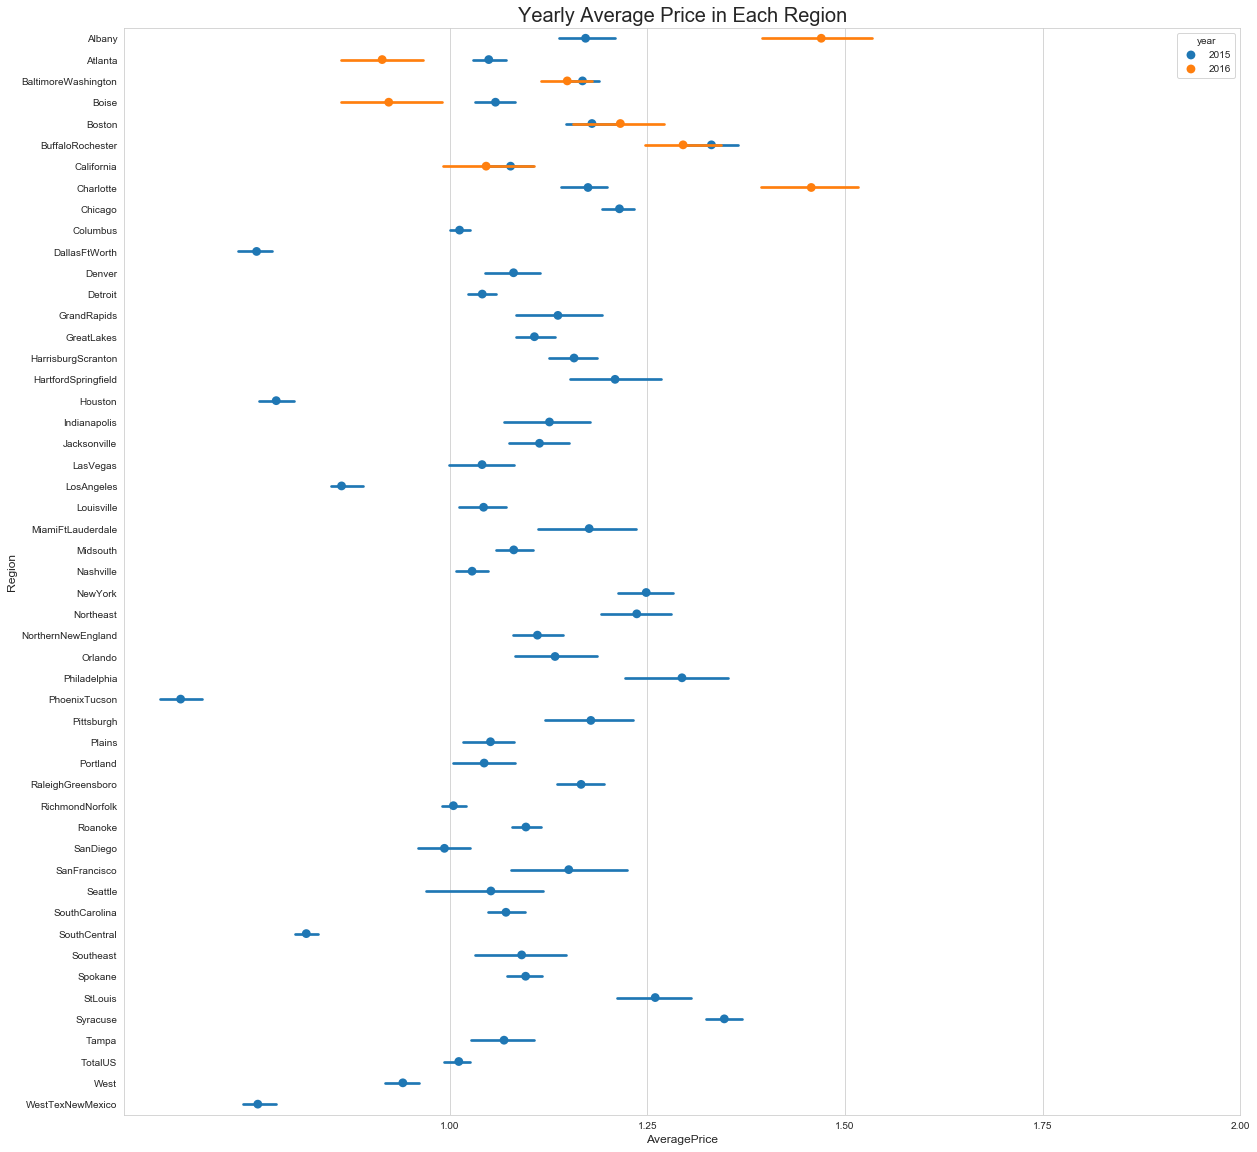

In [16]:
# Analyzing average sales price by region
# In 2016, avocados were most expensive in Albany and California. However, the prices got significantly reduced in Atlanta and Boise.
# In 2015, avocados were most expensive in Syracuse, St.Louis, BuffaloRochester, and Philadelphia
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('AveragePrice',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

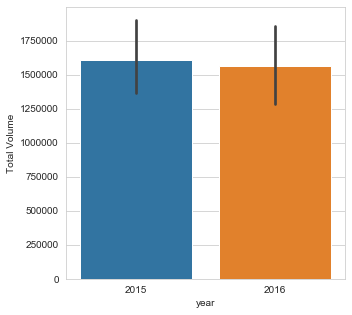

In [17]:
# The average total volume decreased in 2016 as compared to 2015, whereas the average 
plt.figure(figsize=(5,5))
sns.barplot(x='year',y='Total Volume', data=data)

In [18]:
# Dropping date and year columns as they dont influence average price of avocados
# Dropping total volume and total bags to prevent multicollinearity
data.drop(columns=['Date','year', 'Total Volume', 'Total Bags', 'type'], inplace = True)
data

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,region
0.0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.00,Albany
1.0,1.35,674.28,44638.81,58.33,9408.07,97.49,0.00,Albany
2.0,0.93,794.70,109149.67,130.50,8042.21,103.14,0.00,Albany
3.0,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.00,Albany
4.0,1.28,941.48,43838.39,75.78,5986.26,197.69,0.00,Albany
...,...,...,...,...,...,...,...,...
10.0,1.39,57529.11,56366.66,17531.78,48823.53,10354.65,240.28,Charlotte
11.0,1.51,43325.87,52189.61,19419.57,54704.14,8596.56,0.00,Charlotte
12.0,1.48,46364.75,52893.38,16736.92,53332.61,8258.16,825.00,Charlotte
13.0,1.47,54110.79,53593.58,17495.42,55653.47,8278.26,0.00,Charlotte


In [19]:
x=data.drop(columns=['AveragePrice'])
y=data['AveragePrice']

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.loc[:,'4046':'XLarge Bags']=sc.fit_transform(x.loc[:,'4046':'XLarge Bags'])
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,region
0.0,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727,Albany
1.0,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727,Albany
2.0,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727,Albany
3.0,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727,Albany
4.0,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727,Albany


In [21]:
xcat=pd.get_dummies(x[['region']], drop_first = True)
xcat

,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
xnum=x[['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']]
xnum

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0.0,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727
1.0,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727
2.0,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727
3.0,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727
4.0,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727
...,...,...,...,...,...,...
10.0,-0.302475,-0.331910,-0.238672,-0.308916,-0.273213,-0.260489
11.0,-0.309770,-0.334407,-0.224966,-0.299831,-0.288090,-0.292727
12.0,-0.308209,-0.333987,-0.244443,-0.301950,-0.290953,-0.182037
13.0,-0.304230,-0.333568,-0.238936,-0.298364,-0.290783,-0.292727


In [23]:
x=pd.concat([xcat, xnum], axis = 1)
x

,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,...,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-0.302475,-0.331910,-0.238672,-0.308916,-0.273213,-0.260489
11.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-0.309770,-0.334407,-0.224966,-0.299831,-0.288090,-0.292727
12.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-0.308209,-0.333987,-0.244443,-0.301950,-0.290953,-0.182037
13.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-0.304230,-0.333568,-0.238936,-0.298364,-0.290783,-0.292727


In [24]:
# Data for linear regression models
xr=x.loc[:, '4046':'XLarge Bags']
xr

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0.0,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727
1.0,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727
2.0,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727
3.0,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727
4.0,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727
...,...,...,...,...,...,...
10.0,-0.302475,-0.331910,-0.238672,-0.308916,-0.273213,-0.260489
11.0,-0.309770,-0.334407,-0.224966,-0.299831,-0.288090,-0.292727
12.0,-0.308209,-0.333987,-0.244443,-0.301950,-0.290953,-0.182037
13.0,-0.304230,-0.333568,-0.238936,-0.298364,-0.290783,-0.292727


In [25]:
y=np.log1p(y)
y

0.0     0.845868
1.0     0.854415
2.0     0.657520
3.0     0.732368
4.0     0.824175
          ...   
10.0    0.871293
11.0    0.920283
12.0    0.908259
13.0    0.904218
14.0    0.887891
Name: AveragePrice, Length: 1517, dtype: float64

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2score(cm,xr,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        xr_train,xr_test,y_train,y_test=train_test_split(xr, y,random_state = r_state,test_size=0.2)
        cm.fit(xr_train,y_train)
        y_pred=cm.predict(xr_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [27]:
# Using Linear regression model
xr_train, xr_test, y_train, y_test = train_test_split(xr, y, test_size=0.20, random_state=42)
lr=LinearRegression()
lr.fit(xr_train,y_train)
predicty=lr.predict(xr_test)
print('The MAE for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The MSE for linear regression model is :', mean_squared_error(y_test, predicty))
print('The RMSE for linear regression model is :', np.sqrt(mean_squared_error(y_test, predicty)))
print('The r2 score for linear regression is :', r2_score(y_test, predicty))

The MAE for linear regression model is : 0.06446643834916163
The MSE for linear regression model is : 0.007307237232090822
The RMSE for linear regression model is : 0.08548237965856369
The r2 score for linear regression is : 0.15080640330269723


In [28]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(xr,y)
gridrr.best_params_

{'alpha': 100}

In [29]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=100)
maxr2score(rr,xr,y)

Maximum r2_score is at random state : 110  and it is : 0.13805974081017458


In [30]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,xr,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,xr,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  -0.1421715512610815
Standard deviation for Ridge regression from mean r2 score is :  0.3545126944738544


In [31]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(xr,y)
gridlar.best_params_

{'alpha': 0.01}

In [32]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=0.01)
maxr2score(lar,xr,y)

Maximum r2_score is at random state : 44  and it is : 0.028088471328555742


In [33]:
# Using cross validation score to avoid underfitting and overfitting of model
print("Mean r2 score for Lasso Regression: ",cross_val_score(lar,xr,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lar,xr,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -0.021329535255804055
standard deviation in r2 score for Lasso Regression:  0.04626252291011155


In [34]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5)
gridknr.fit(xr,y)
gridknr.best_params_

{'n_neighbors': 11}

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=11)
maxr2score(knr,xr,y)

Maximum r2_score is at random state : 1  and it is : 0.7825381880625204


In [36]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,xr,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,xr,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  -0.06350608129757718
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.4945043050286938


In [37]:
# Using Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
hyperparametersrfr={'criterion':['mse','mae'],'max_depth':range(1,10)}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2')
gridrfr.fit(xr,y)
print(gridrfr.best_params_)

{'criterion': 'mae', 'max_depth': 4}


In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion='mae', max_depth=4)
maxr2score(rfr,xr,y)

Maximum r2_score is at random state : 1  and it is : 0.6827116704917939


In [39]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(rfr,xr,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(rfr,xr,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.3556972597605843
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.14420313887674746


In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,10)}
griddtr=GridSearchCV(dtr, hyperparametersrfr, cv=5, scoring='r2')
griddtr.fit(xr,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 3}


In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=3)
maxr2score(dtr,xr,y)

Maximum r2_score is at random state : 131  and it is : 0.5971242067260811


In [42]:
print("Mean r2 score for DecisionTreeRegressor after cross validation: ", cross_val_score(dtr,xr,y,cv=5,scoring="r2").mean())
print("Standard deviation for DecisionTreeRegressor from mean r2 score is : ", cross_val_score(dtr,xr,y,cv=5,scoring="r2").std())

Mean r2 score for DecisionTreeRegressor after cross validation:  0.22107026692742746
Standard deviation for DecisionTreeRegressor from mean r2 score is :  0.20249364192278782


In [43]:
# Among all the models, Random Forest Regressor predicted results most accurately
rfr=RandomForestRegressor(criterion='mse', max_depth=2)
xr_train,xr_test,y_train,y_test=train_test_split(xr,y,test_size=0.20,random_state=1)
rfr.fit(xr_train,y_train)
predictyrfr=rfr.predict(xr_test)
predictyrfr

array([0.73802237, 0.73802237, 0.77588919, 0.67668741, 0.73802237,
       0.69465397, 0.67668741, 0.73802237, 0.77588919, 0.77588919,
       0.59298616, 0.71382106, 0.72016795, 0.77588919, 0.73802237,
       0.7512119 , 0.58676523, 0.77588919, 0.61446355, 0.73802237,
       0.73802237, 0.69465397, 0.69465397, 0.77588919, 0.71382106,
       0.73802237, 0.74436926, 0.73802237, 0.77588919, 0.74662664,
       0.73802237, 0.73802237, 0.73802237, 0.77588919, 0.73802237,
       0.69465397, 0.73802237, 0.58676523, 0.7512119 , 0.67668741,
       0.69465397, 0.78907872, 0.69465397, 0.77588919, 0.72016795,
       0.73802237, 0.69465397, 0.73802237, 0.75655216, 0.74662664,
       0.69811244, 0.73802237, 0.78907872, 0.72016795, 0.73802237,
       0.59298616, 0.77588919, 0.74662664, 0.73802237, 0.74662664,
       0.67668741, 0.77588919, 0.77588919, 0.73802237, 0.60470901,
       0.73802237, 0.58676523, 0.67668741, 0.73802237, 0.69465397,
       0.69465397, 0.69465397, 0.77588919, 0.73802237, 0.69926

In [44]:
y_test

10.0    0.810930
33.0    0.746688
7.0     0.732368
11.0    0.604316
50.0    0.774727
          ...   
29.0    0.688135
45.0    0.746688
35.0    0.737164
46.0    0.683097
25.0    0.797507
Name: AveragePrice, Length: 304, dtype: float64

Text(0, 0.5, 'Predicted Y')

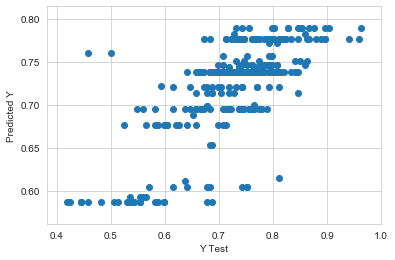

In [50]:
plt.scatter(x=y_test,y=predictyrfr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predictyrfr)))
print("r2_score is: ",r2_score(y_test,predictyrfr))

RMSE is:  0.06644600674281309
r2_score is:  0.5068129817956051


In [52]:
# Saving the model
from sklearn.externals import joblib 
joblib.dump(rfr, 'Avocado.pkl')

['Avocado.pkl']